In [1]:
import numpy as np
from numpy import fft
from scipy import misc
import matplotlib.pyplot as plt
from skimage.restoration import inpaint
%matplotlib inline

In [5]:
def get_image(filename):
    # Read file into np array
    return misc.imread(filename)    

def cross_correlation(a,b):
    # calculate the peak cross-correlation between two signals
    return np.argmax(abs(fft.ifft(fft.fft(a) * np.conj(fft.fft(b)))))

In [6]:
def fiximage(im):
    """Restores images degraded from line desynchronization due to the digitisation process

    input numpy ndarray or object which can be convert to numpy ndarray
    """
    
    im = np.array(im)
    
    
    corrected_image = im.copy()
    # create mask for inpainting 
    mask = np.zeros(im.shape)
   
    # iterate over each horizontal line in the image
    for i in range(1,len(im)):        
        indices = []
        
        # calculate shift from lines above and below line of interest
        for j in range(i-3 if i-4 > 0 else 0,i+4 if i+4 < len(im) else len(im)):
            if i != j:
                idx = cross_correlation(corrected_image[i],corrected_image[j])
                # for shifts close to zero take shift as zero
                # neccessary for inaccuracy of cross-correlation 
                if idx in [0,1,2,len(im)-1,len(im)-2]:
                    indices = [0]
                    break
                indices.append(idx)                    
        
        # if shift zero relative to a line take shift as zero
        if 0 in indices:
            idx = 0
        else:
            # take mean of indices unless shift is too large - assumed to be a mistake - in which case ignore 
            # possibilty to return Nan here, not important for the images in question
            idx = int(round(if np.mean([x for x in indices if len(im)/10. > x or len(im)-len(im)/10. < x])))
        
        # ignore shift is large presumed to be a mistake
        if len(im)/10. < idx < len(im)-len(im)/10.:
            idx = 0          
        
        # create mask for line i
        if idx != 0:
            if idx > (len(im)-1)/2:
                # mask created for both sides due to inaccuracy of the shift
                mask[i][:len(im)-1-idx] = [1 for x in im[i][:len(im)-1-idx]]
                mask[i][idx:] = [1 for x in im[i][idx:]]
            else:
                mask[i][len(im)-1-idx:] = [1 for x in im[i][len(im)-1-idx:]]
                mask[i][:idx] = [1 for x in im[i][:idx]]
        
        # shift line i given result    
        if idx != 0:
            corrected_image[i] = np.array([x for x in im[i][idx:]]+[x for x in im[i][:idx]])
    
    # mask image
    corrected_image[np.where(mask)] = 0   
    # peform inpainting
    image_result = inpaint.inpaint_biharmonic(corrected_image, mask)             
    
    return image_result, im

In [7]:
image = get_image('images/desync1.pgm')
for _ in range(0,10):
    image = fiximage(image)

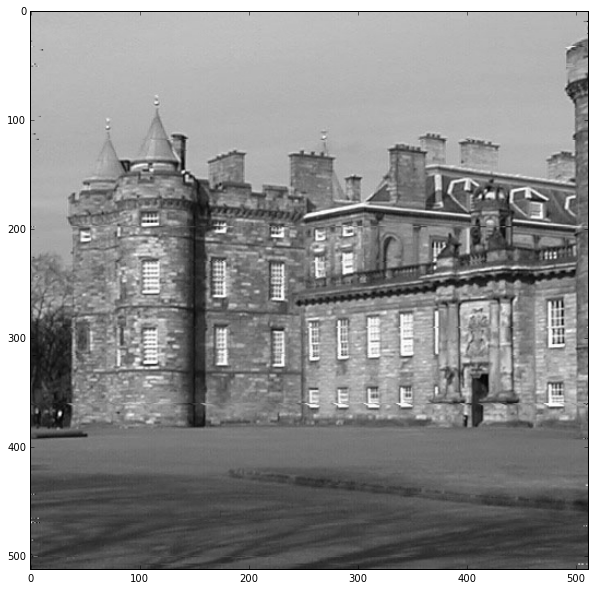

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')

In [55]:
image = get_image('images/desync2.pgm')
for _ in range(0,5):
image = fiximage(image)

(386, 589) (386, 589)
(386, 589) (386, 589)
(386, 589) (386, 589)
(386, 589) (386, 589)
(386, 589) (386, 589)


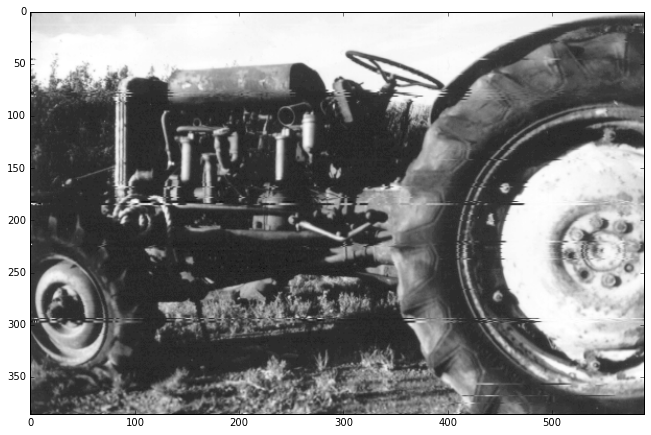

In [57]:
plt.figure(figsize=(11,8))
plt.imshow(image,cmap='gray')

In [64]:
image = fiximage(get_image('images/desync3.pgm'))
print('done')
image = fiximage(image)
print('done')

(828, 1299) (828, 1299)
done
(828, 1299) (828, 1299)
done


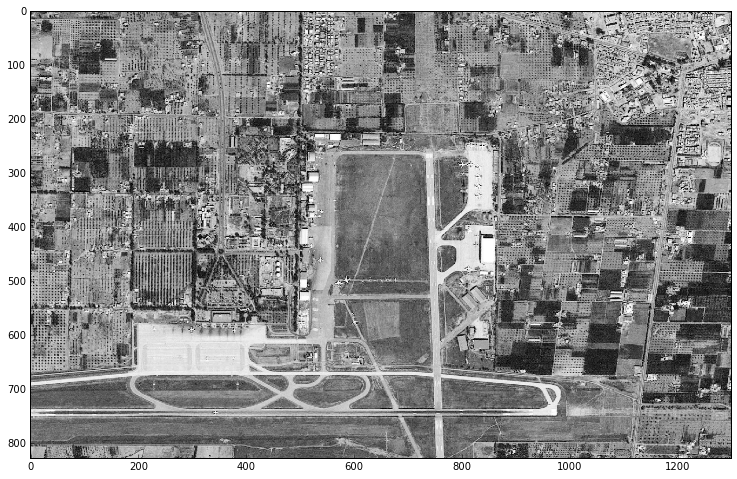

In [65]:
plt.figure(figsize=(13,8))
plt.imshow(image,cmap='gray')

In [68]:
image = fiximage(get_image('images/desync4.pgm'))
print('done')
image = fiximage(image)
print('done')

(1114, 1200) (1114, 1200)
done
(1114, 1200) (1114, 1200)
done


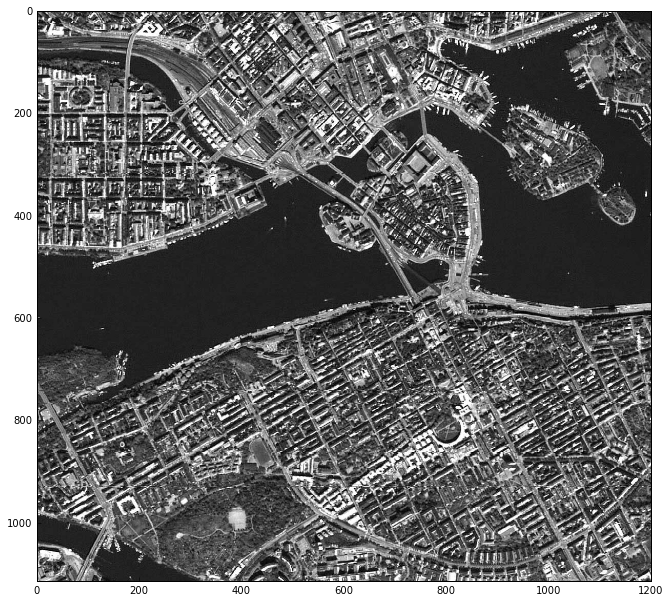

In [69]:
plt.figure(figsize=(11,12))
plt.imshow(image,cmap='gray')

In [49]:
def fast_fiximage(im):
    
    corrected_image = im.copy()
    mask = np.zeros(len(im))   
    
    for i in range(1,len(im)-1):        
        indices = []
        js = []
        
        #print(i)
        for j in range(i-3 if i-4 > 0 else 0,i+4 if i+4 < len(im) else len(im)):
            idx = cross_correlation(corrected_image[i],corrected_image[j])
            if i != j:                
                #if (len(im)-1)/2 < idx:
                    #idx = len(im)-1-idx
                #if i > j and idx != 0:
                #    idx = len(im)-1-idx     
                indices.append(idx)
                    
                js.append(j)
        if idx != 0:
            mask[i] = 1

        if 0 in indices:
            idx = 0            
        if 1 in indices:
            idx = 0
        elif 2 in indices:
            idx = 0
        elif len(im) in indices:
            idx = 0
        elif len(im)-1 in indices:
            idx = 0
        elif len(im)-2 in indices:
            idx = 0
        else:
            idx = int(round(np.mean([x for x in indices if (x < len(im)/20. or x > len(im)-len(im)/20.)])))
            
        
        if len(im)/10. < idx < len(im)-len(im)/10.:
            idx = 0
            
        #if check_list(indices):
        #    idx = 0
        
        #print(i,idx,indices,js)
                
        if idx != 0:
            corrected_image[i] = np.array([x for x in im[i][idx:]]+[x for x in im[i][:idx]])
            
    corrected_image[np.where(mask)] = 0
                
    #plt.figure(figsize=(20,20))
    #plt.imshow(im,cmap=plt.cm.gray) 
    #plt.figure(figsize=(20,20))
    #plt.imshow(corrected_image,cmap=plt.cm.gray)
    
    image_result = inpaint.inpaint_biharmonic(corrected_image, mask, multichannel=True)             

    #plt.figure(figsize=(20,20))
    #plt.imshow(image_result,cmap='gray')
    
    return image_result

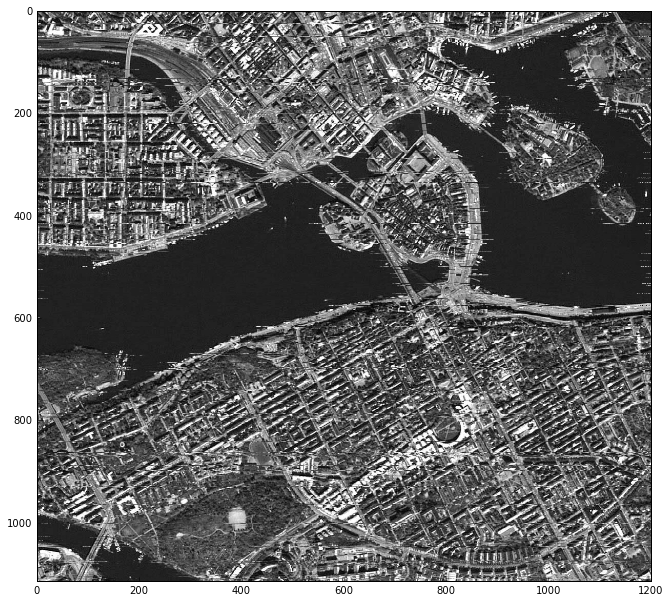

In [75]:
image = get_image('images/desync4.pgm')
plt.figure(figsize=(11,12))
plt.imshow(image,cmap='gray')

In [71]:
image.shape

(1114, 1200)